## Exploratory Data Analysis EDA for Algerian Forest Fire Prediction

#### Task Given by my instructor  Krish Naik:

1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

2. Do proper EDA(analysis) of your dataset and create a report from your dataset

3. Then perform necessary preprocessing steps 
4.  Then create a classification and regression model for a given dataset.
5.  For regression use linear regression, ridge regression and lasso
regression, SVR, Decision tree regressor and random forest
regressor along with cross validation and hyperparameter tuning.Try
to showcase the MSE value for each model and try to find out the
best possible model based on the R2 value.
6. In classification models try to use logistic regression, SVM, decision
tree, naive bayes and random forest along with hyperparametertuning and cross validation and print your classification report and
showcase the best possible model based on that report.
* API Testing:
1. Now create a flask API for testing your model(via postman) or you
can create an HTML page(optional)
2. While creating the API you have to perform single value prediction
as well as bulk prediction.
3. Load your data via mongo db or mysql(for bulk prediction)
4. Try to perform api testing in a modular way (modular coding with
classes and objects)
5. Do proper logging for your application.
6. Try to handle exceptions at each and every step.


**Note:**
* The Fire Weather Index (FWI) is a meteorologically based index used worldwide to estimate fire danger.
It consists of different components that account for the effects of fuel moisture and wind on fire behaviour and spread
For our regression modelling , we will predict fire base on FWI

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv" , header=1)

In [4]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
cols = data.columns

### Insertion and Loading  data via mysql (for bulk prediction)

***MSQL DATABASE CONNECTOR***

In [6]:
#!pip install mysql-connector-python   

#### Create a database for our dataframe

In [17]:
import mysql.connector as connection  #import msql connector

In [18]:
connex = connection.connect(host="localhost",user="root", passwd="mysql",use_pure=True)

In [23]:
#creating a database
curs = connex.cursor()
#curs.execute("create database Algerian_forest_fires_data")

### Creating a table AFFDatasetDetails

In [24]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", database = 'Algerian_forest_fires_data',user="root", passwd="mysql",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())

    query = "CREATE TABLE AFFDatasetDetails (month INT(4)," \
            "Temperature INT(10), RH INT(5),Ws INT(10), Rain float(5),FFMC float(5),DMC float(5),DC float(5),ISI float(5),"\
    " BUI float(5),FWI float(5) ,Classes INT(2), Region INT(2) )"

    #cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
name 'cursor' is not defined


In [25]:
# importing sql engine
from sqlalchemy import create_engine

In [26]:
# create sqlalchemy engine
engine = create_engine('sqlite://', echo=False)

In [29]:
# Insert whole DataFrame into MySQL
data.to_sql('AFFDatasetDetails', con = engine, if_exists = 'append')

### Retrieve Records from a Database

In [30]:
result = engine.execute("SELECT * FROM AFFDatasetDetails").fetchall()

In [31]:
result

[(0, '01', '06', '2012', '29', '57', '18', '0', '65.7', '3.4', '7.6', '1.3', '3.4', '0.5', 'not fire   '),
 (1, '02', '06', '2012', '29', '61', '13', '1.3', '64.4', '4.1', '7.6', '1', '3.9', '0.4', 'not fire   '),
 (2, '03', '06', '2012', '26', '82', '22', '13.1', '47.1', '2.5', '7.1', '0.3', '2.7', '0.1', 'not fire   '),
 (3, '04', '06', '2012', '25', '89', '13', '2.5', '28.6', '1.3', '6.9', '0', '1.7', '0', 'not fire   '),
 (4, '05', '06', '2012', '27', '77', '16', '0', '64.8', '3', '14.2', '1.2', '3.9', '0.5', 'not fire   '),
 (5, '06', '06', '2012', '31', '67', '14', '0', '82.6', '5.8', '22.2', '3.1', '7', '2.5', 'fire   '),
 (6, '07', '06', '2012', '33', '54', '13', '0', '88.2', '9.9', '30.5', '6.4', '10.9', '7.2', 'fire   '),
 (7, '08', '06', '2012', '30', '73', '15', '0', '86.6', '12.1', '38.3', '5.6', '13.5', '7.1', 'fire   '),
 (8, '09', '06', '2012', '25', '88', '13', '0.2', '52.9', '7.9', '38.8', '0.4', '10.5', '0.3', 'not fire   '),
 (9, '10', '06', '2012', '28', '79', '12'

In [32]:
#Creating a Dataframe
data_retrieved = pd.DataFrame(result, columns=['id','day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes'])

In [33]:
df = data_retrieved.drop('id' , axis=1)

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### DATA CLEANING

In [35]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,None,None,None,None,None,None,None,None,None,None,None,None,None
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,None


In [60]:
df= df.drop(index=[122], axis = 0)

Note : Data Set Information:
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire for(138 classes) and not fire (106 classes) classes.

In [37]:
df.loc[:122, 'Region'] = "Bejaia" 

In [38]:
df.loc[122: , "Region"] = " Sidi Bel-abbes "

In [39]:
df = df.drop(['day','month','year'], axis=1 ) # Delete 

In [40]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


In [41]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [42]:
df.columns = df.columns.str.strip()

In [43]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [44]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [45]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
Classes            1
not fire           1
Name: Classes, dtype: int64

In [46]:
#Dismissing whithespaces
df['Classes'] = df['Classes'].str.strip()

In [47]:
df.Classes.value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

#### Encode region and classes

In [48]:
df['Classes']= np.where(df['Classes']=='fire',1,0) # 1 if Fire otherwise 0

In [49]:
df['Region'] = np.where(df['Region']=="Bejaia",1,2)  # 1 if Bejaia region otherwise 2

In [50]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,1


In [51]:
df.Classes.unique()

array([0, 1])

In [52]:
df.Region.unique()

array([1, 2])

### changing dtypes


In [61]:
df[['Temperature','RH', 'Ws']] = df[['Temperature','RH', 'Ws']].astype(int)

In [62]:
df[['Rain','FFMC', 'DMC' ,'DC','ISI','BUI','FWI']] = df[['Rain','FFMC', 'DMC' ,'DC','ISI','BUI','FWI']].astype(float)

In [63]:
df.dtypes

Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int32
dtype: object

In [64]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [65]:
###Saving df cleaned
df.to_csv('Algerian_forest_fires_data_CLEAN.csv', index=False)

### Exploratory Data Analysis

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


### Univariate analysis


Histograms are similar to bar charts which display the counts or relative frequencies of values falling in different class intervals or ranges. A histogram displays the shape and spread of continuous sample data. It also helps us understand the skewness and kurtosis of the distribution of the data.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


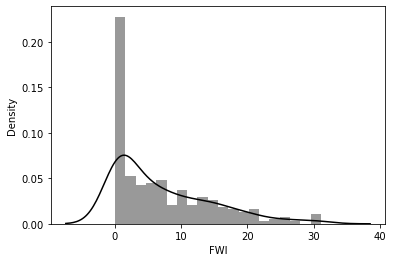

In [68]:
_=sns.distplot(df['FWI'],bins=20 , color='black')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


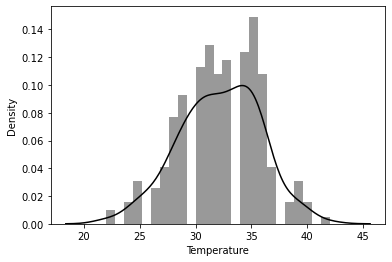

In [69]:

_=sns.distplot(df['Temperature'],bins=25 , color='black')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


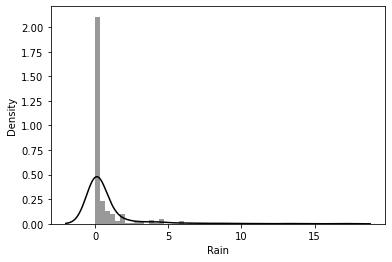

In [70]:

_=sns.distplot(df['Rain'], color='black')

### Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


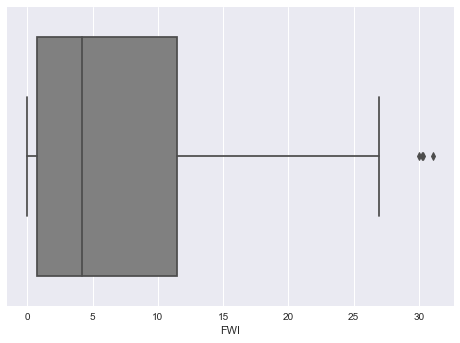

In [74]:
ax = sns.boxplot(df['FWI'], color= 'grey')

### Visualize all features

* Density plots are used to study the distribution of one or a few variables. Checking the distribution of your variables one by one is probably the first task you should do when you get a new dataset. It delivers a good quantity of information.

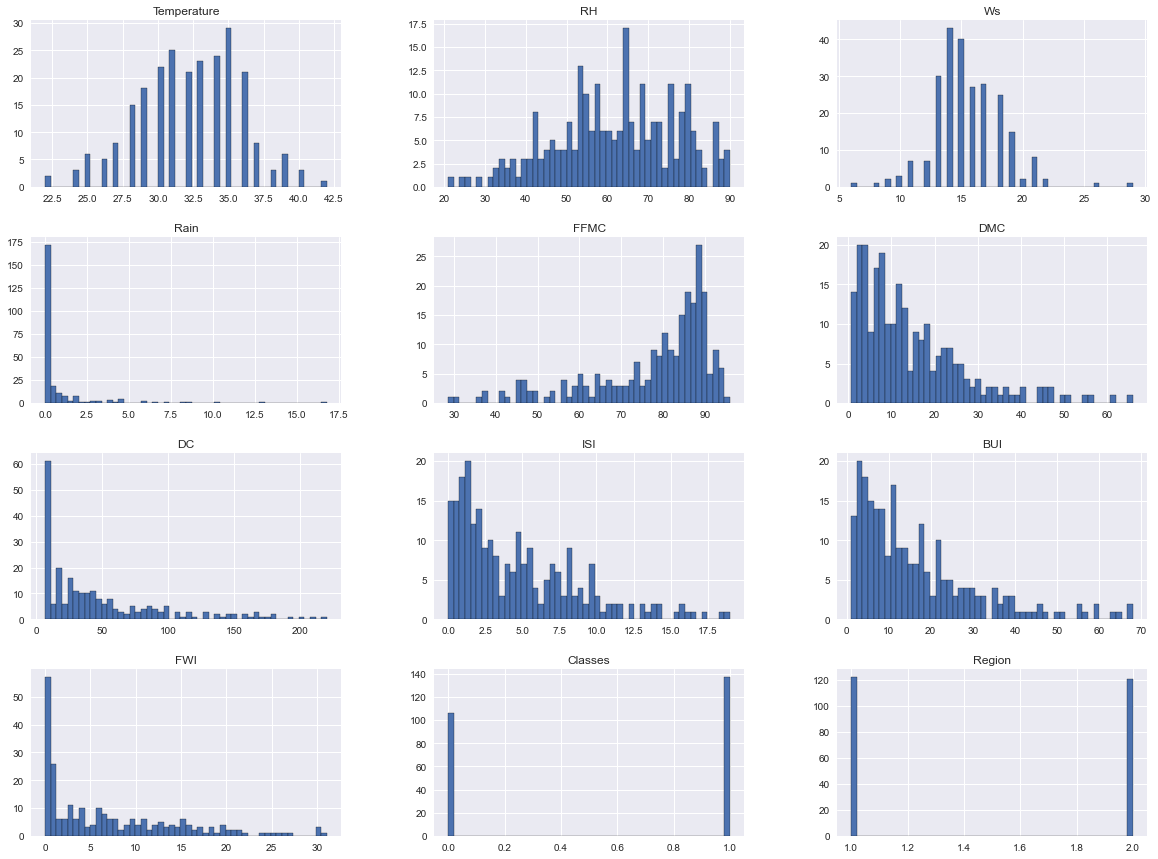

In [72]:
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'black')
plt.show()

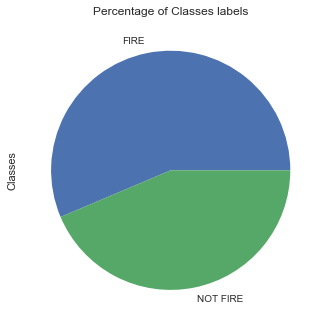

In [75]:
_=plt.title("Percentage of Classes labels")
_=df.Classes.value_counts().plot.pie(labels = ["FIRE","NOT FIRE"])

### Correlation Matrix

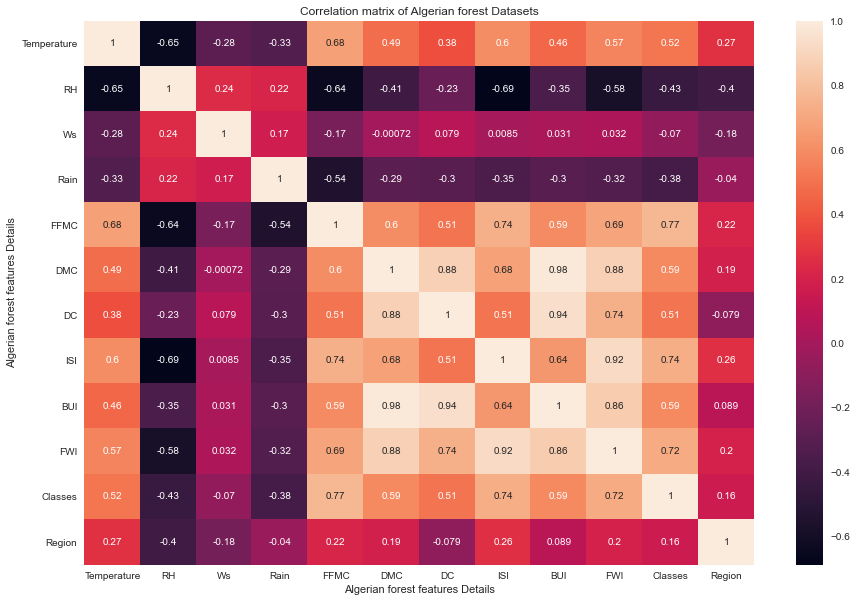

In [96]:
_=plt.figure(figsize=(15,10))
_=hmap = sns.heatmap(df.corr(), annot = True)
_=hmap.set(xlabel = 'Algerian forest features Details',
         ylabel = 'Algerian forest features Details',
        title ='Correlation matrix of Algerian forest Datasets' )

## Barchar

In [98]:
def barchart(feature,xlabel):#barchar funcion
    plt.figure(figsize=[14,8])
    by_feature =  df.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

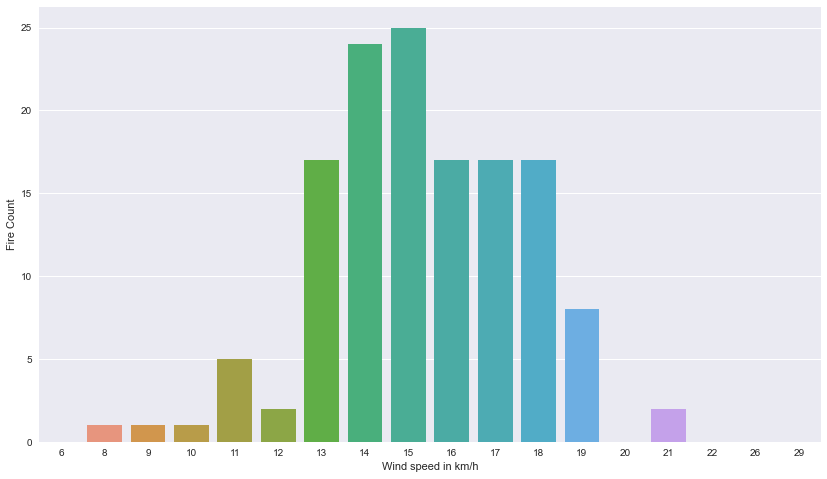

In [99]:
barchart("Ws" , 'Wind speed in km/h')

* Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire